In [2]:
# Import kagglehub and pandas
import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("aasheesh200/framingham-heart-study-dataset")

# Specify the path to the CSV file within the downloaded dataset folder
file_path = f"{path}/framingham.csv"  # Adjust 'framingham.csv' if the filename is different

# Load the data into a DataFrame
data = pd.read_csv(file_path)

# Save the DataFrame to a new CSV file in the Colab environment
data.to_csv("framingham_heart_study.csv", index=False)

print("Dataset downloaded and saved as 'framingham_heart_study.csv'")


100%|██████████| 58.0k/58.0k [00:00<00:00, 41.1MB/s]

Extracting files...


Dataset downloaded and saved as 'framingham_heart_study.csv'


In [3]:
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
data.rename(columns={ 'male': 'Sex_male' }, inplace= True)


In [7]:
data.dropna(axis =0, inplace= True)
print(data.shape)
print(data.TenYearCHD.value_counts())


(3658, 16)
TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [8]:
import numpy as np
import sklearn.preprocessing as preprocessing
X= np.asarray (data[['Sex_male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y=np.asarray (data['TenYearCHD'])

#Normalization of the dataset
X= preprocessing.StandardScaler().fit(X).transform(X)

#Training and testing model
from sklearn.model_selection import train_test_split
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2926, 6) (732,)
Test set: (732, 6) (2926,)


<ipython-input-9-e6e8dc2d225f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='TenYearCHD', data= data, palette= 'hls')


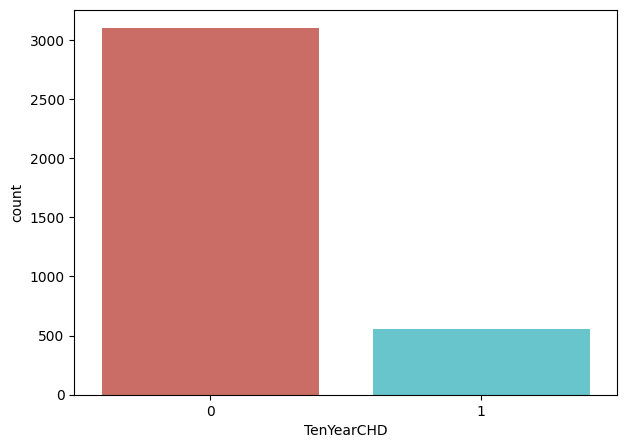

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
#counting no. of patients affeted with CHD
plt.figure(figsize= (7,5))
sn.countplot(x='TenYearCHD', data= data, palette= 'hls')
plt.show()

In [10]:
X.shape

(3658, 6)

In [11]:
y.shape

(3658,)

Shape of X: (3658, 6)
Shape of y: (3658,)
Shape of X_train: (2926, 6)
Shape of y_train: (2926,)
Shape of X_test: (732, 6)
Shape of y_test: (732,)


<ipython-input-15-68c2128f6b4f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='TenYearCHD', data=data, palette='hls')


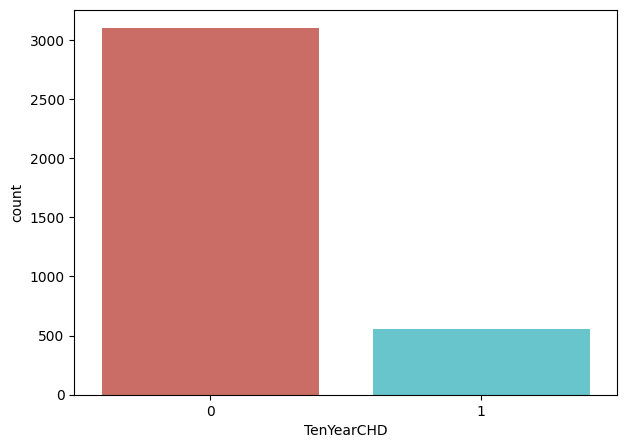

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

In [15]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import StandardScaler
# Ensure the data has the correct structure
X = np.asarray(data[['Sex_male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(data['TenYearCHD'])

# Check if X and y have the same number of samples
print("Shape of X:", X.shape)  # Should be (3658, n_features)
print("Shape of y:", y.shape)  # Should be (3658,)

# Split the data into training and testing sets (correct unpacking order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Ensure the shapes of X_train and y_train match
print('Shape of X_train:', X_train.shape)  # This should be (2926, 6)
print('Shape of y_train:', y_train.shape)  # This should be (2926,)

print('Shape of X_test:', X_test.shape)    # This should be (732, 6)
print('Shape of y_test:', y_test.shape)    # This should be (732,)

# Visualizing the distribution of CHD (TenYearCHD)
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=data, palette='hls')
plt.show()

# Scaling the features for the training and testing sets
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Train the Logistic Regression Model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_scaled, y_train)

# Predicting using the trained model
y_pred = LR.predict(X_test_scaled)

# Output the predictions
print("Predictions:", y_pred)

# Evaluate the model (e.g., confusion matrix, accuracy score)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)


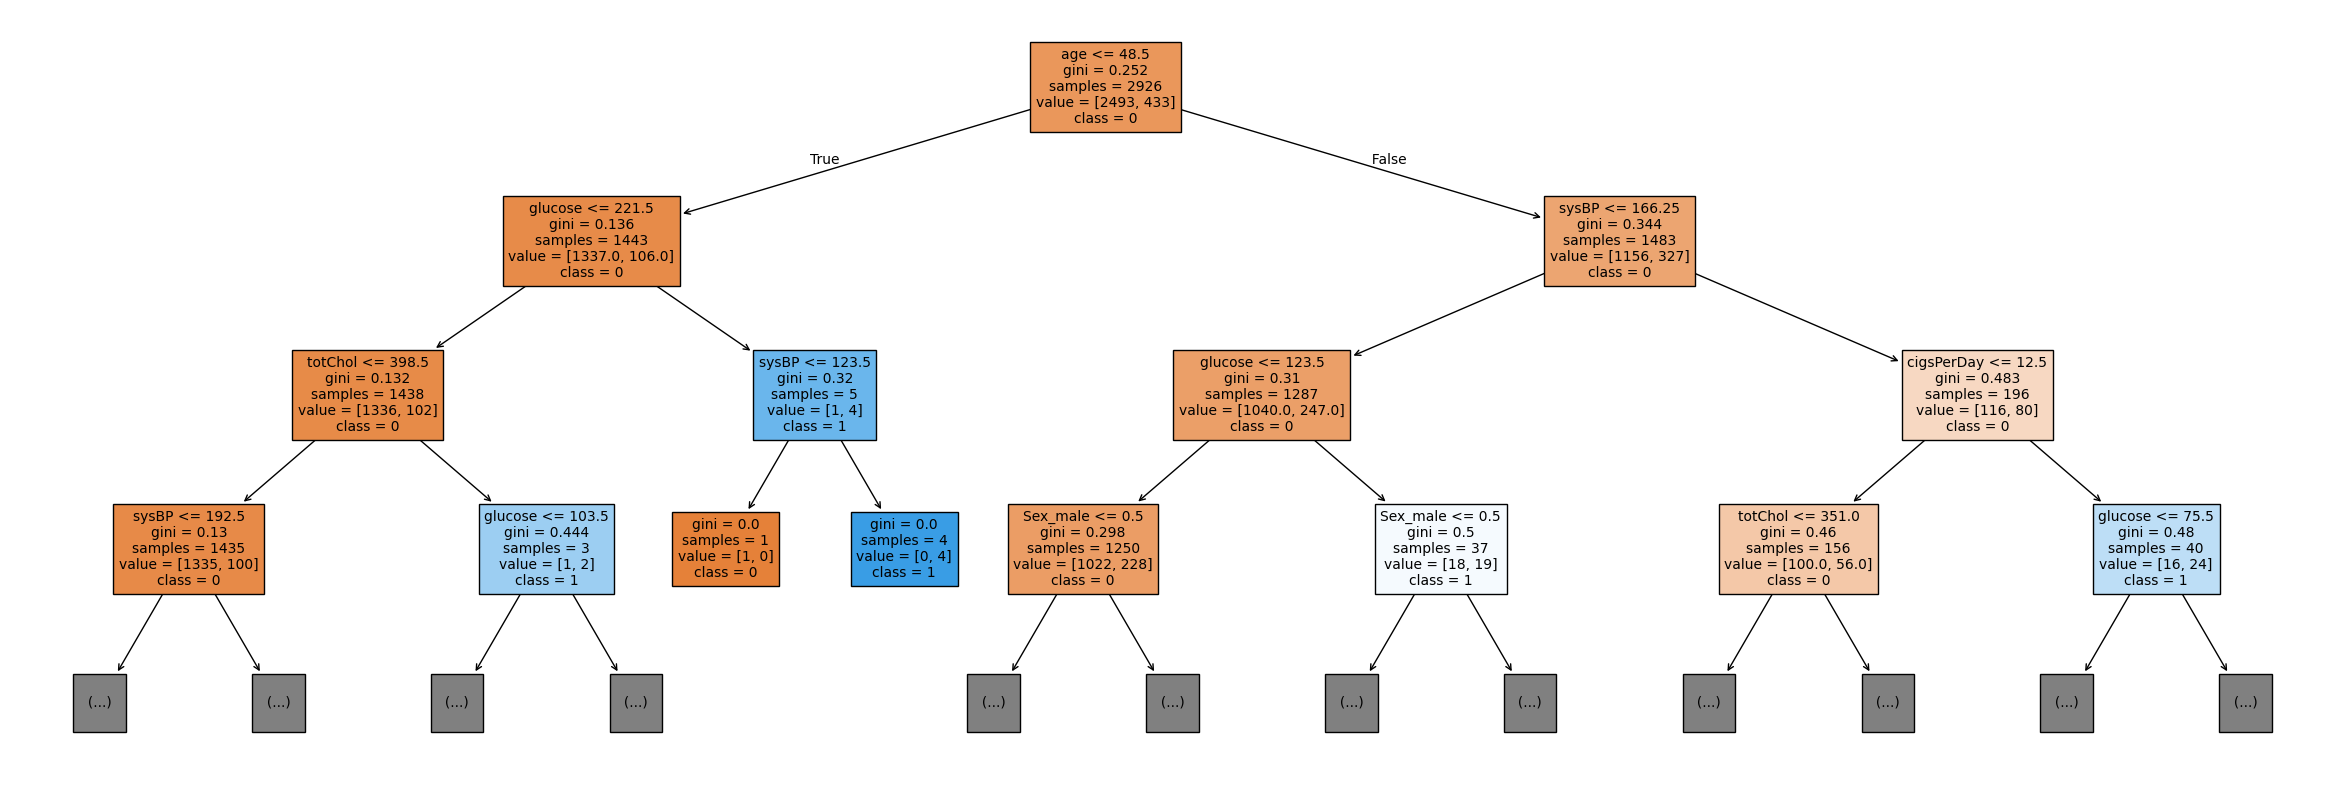

In [19]:
# Manually define the feature names if X_train is a NumPy array
feature_names = ['Sex_male', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']  # replace with actual feature names

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree model
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_train, y_train)

# Plot the Decision Tree with feature names
plt.figure(figsize=(30,10))
plot_tree(dtc, feature_names=feature_names, class_names=["0", "1"], filled=True, fontsize=10, max_depth=3)
plt.show()
